## Project	4:	Dynamical	processes	in	networks

Giovanna Zolin Pinheiro Hayasida - n: 9762848 

Luna Wagner Cunha - n: 9762831

1 - rodar 

2- Ok                                              comentar 

3 - rodar e completar com o do pedrino  

In [1]:
#Pacotes 
import pylab as pylt
import networkx as nx 
import matplotlib.pyplot as plt
from numpy  import *
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss

from scipy.linalg import expm
from scipy.sparse import csr_matrix, issparse
from scipy import stats
import collections
from scipy.stats import moment

# from networkx.algorithms.community import LFR_benchmark_graph
from sklearn.metrics import mutual_info_score
from community import community_louvain
from networkx.algorithms import community
from community import community_louvain
import networkx.algorithms.community as nx_comm

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Exercicio 1

. Erdös-Rényi	networks

In [2]:
def failures(H):
    G = H.copy()
    from random import choice
    N0 = len(G)
    vn = []
    S = []
    n = 0 #number of nodes removed
    while(len(G.nodes()) > int(0.01*N0)):
        node = random.choice(G.nodes()) #select the node on the largest component
        G.remove_node(node) 
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        Glc=Gcc[0] 
        S.append(len(Glc)/N0) #store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    return S, vn

def most_connected(G): # This function is used to find the most connected node
    maxk = 0
    node = 0
    for i in G.nodes():
        if(G.degree(i) >= maxk):
            maxk = G.degree(i)
            node = i
    return node 

def attacks(H):
    G = H.copy()
    from random import choice
    N0 = len(G)
    vn = []
    S = []
    n = 0 #number of nodes removed
    while(len(G.nodes()) > int(0.01*N0)):
        #print('Removing... n = ', n)
        #print(G.nodes)
        node = most_connected(G) #select the most connected node on the largest component            
        #print('selected to removed:', node)
        G.remove_node(node) 
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        Glc=Gcc[0] 
        S.append(len(Glc)/N0) #store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    return S, vn

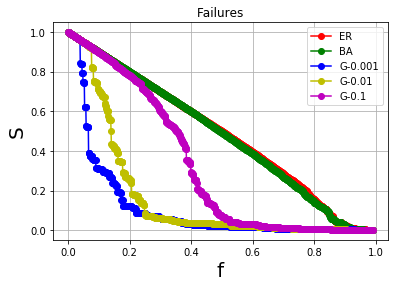

In [3]:
# Para as falhas
Sf_er = [] 
vnf_er = []
Sf_ba = [] 
vnf_ba = []
Sf_g3= [] 
vnf_g3 = []
Sf_g2= [] 
vnf_g2 = []
Sf_g1 = [] 
vnf_g1 = []

N = 1000
av_degree = 10
p = av_degree/(N-1)
m = int(av_degree/2)
count = 0

for count in np.arange(0,2,1):
    # ER
    Sf = [] 
    vnf = []
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Sf,vnf = failures(GER)
    Sf_er.append(Sf)
    vnf_er.append(vnf)
    
    #BA,
    Sf = [] 
    vnf = []
    GBA = nx.barabasi_albert_graph(N, m)
    Sf, vnf = failures(GBA)
    Sf_ba.append(Sf)
    vnf_ba.append(vnf)
    
    # Small worlds
    Sf = [] 
    vnf = []
    G_3 = nx.watts_strogatz_graph(N, m, 0.001, seed=None)
    Sf, vnf = failures(G_3)
    Sf_g3.append(Sf)
    vnf_g3.append(vnf)
    
    Sf = [] 
    vnf = []
    G_2 = nx.watts_strogatz_graph(N, m, 0.01, seed=None)
    Sf, vnf = failures(G_2)
    Sf_g2.append(Sf)
    vnf_g2.append(vnf)
    
    Sf = [] 
    vnf = []
    G_1 = nx.watts_strogatz_graph(N, m, 0.1, seed=None)
    Sf, vnf = failures(G_1)
    Sf_g1.append(Sf)
    vnf_g1.append(vnf)

    count = count + 1
    
sf_er = np.mean(np.array(Sf_er), axis = 0)
Vnf_er = np.mean(np.array(vnf_er), axis = 0)
sf_ba = np.mean(Sf_ba, axis = 0)
Vnf_ba = np.mean(vnf_ba, axis = 0)
sf_g3 = np.mean(Sf_g3, axis = 0)
Vnf_g3 = np.mean(vnf_g3, axis = 0)
sf_g2 = np.mean(Sf_g2, axis = 0)
Vnf_g2 = np.mean(vnf_g2, axis = 0)
sf_g1 = np.mean(Sf_g1, axis = 0)
Vnf_g1 = np.mean(vnf_g1, axis = 0)

plt.figure()
plt.plot(Vnf_er,sf_er,'-or', label='ER')
plt.plot(Vnf_ba,sf_ba,'-or', label='BA', color = 'g')
plt.plot(Vnf_g3,sf_g3,'-or', label='G-0.001',color = 'b')
plt.plot(Vnf_g2,sf_g2,'-or', label='G-0.01', color = 'y')
plt.plot(Vnf_g1,sf_g1,'-or', label='G-0.1', color = 'm')

plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.legend()
plt.title("Failures")
plt.grid(True)
plt.show(); 

Contra os ataques, as redes ER e BA são mais robustas por sofrerem quedas mais graduais, ao contrário das Small-world que caem mais drasticamente.

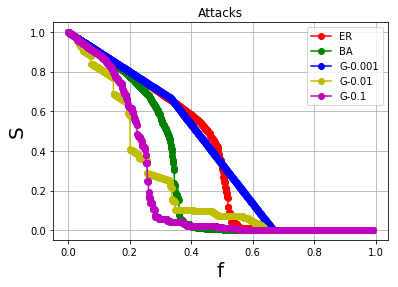

In [4]:
# Para os Ataques
Sf_er = [] 
vnf_er = []
Sf_ba = [] 
vnf_ba = []
Sf_g3= [] 
vnf_g3 = []
Sf_g2= [] 
vnf_g2 = []
Sf_g1 = [] 
vnf_g1 = []

N = 1000
av_degree = 10
p = av_degree/(N-1)
m = int(av_degree/2)
count = 0

for count in np.arange(0,2,1):
    # ER
    Sf = [] 
    vnf = []
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Sf,vnf = attacks(GER)
    Sf_er.append(Sf)
    vnf_er.append(vnf)
    
    #BA,
    Sf = [] 
    vnf = []
    GBA = nx.barabasi_albert_graph(N, m)
    Sf, vnf = attacks(GBA)
    Sf_ba.append(Sf)
    vnf_ba.append(vnf)
    
    # Small words
    Sf = [] 
    vnf = []
    G_3 = nx.watts_strogatz_graph(N, m, 0.001, seed=None)
    Sf, vnf = attacks(G_3)
    Sf_g3.append(Sf)
    vnf_g3.append(vnf)
    
    Sf = [] 
    vnf = []
    G_2 = nx.watts_strogatz_graph(N, m, 0.01, seed=None)
    Sf, vnf = attacks(G_2)
    Sf_g2.append(Sf)
    vnf_g2.append(vnf)
    
    Sf = [] 
    vnf = []
    G_1 = nx.watts_strogatz_graph(N, m, 0.1, seed=None)
    Sf, vnf = attacks(G_1)
    Sf_g1.append(Sf)
    vnf_g1.append(vnf)

    count = count + 1
    
sf_er = np.mean(np.array(Sf_er), axis = 0)
Vnf_er = np.mean(np.array(vnf_er), axis = 0)
sf_ba = np.mean(Sf_ba, axis = 0)
Vnf_ba = np.mean(vnf_ba, axis = 0)
sf_g3 = np.mean(Sf_g3, axis = 0)
Vnf_g3 = np.mean(vnf_g3, axis = 0)
sf_g2 = np.mean(Sf_g2, axis = 0)
Vnf_g2 = np.mean(vnf_g2, axis = 0)
sf_g1 = np.mean(Sf_g1, axis = 0)
Vnf_g1 = np.mean(vnf_g1, axis = 0)

plt.figure()
plt.plot(Vnf_er,sf_er,'-or', label='ER')
plt.plot(Vnf_ba,sf_ba,'-or', label='BA', color = 'g')
plt.plot(Vnf_g3,sf_g3,'-or', label='G-0.001',color = 'b')
plt.plot(Vnf_g2,sf_g2,'-or', label='G-0.01', color = 'y')
plt.plot(Vnf_g1,sf_g1,'-or', label='G-0.1', color = 'm')

plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.legend()
plt.title("Attacks")
plt.grid(True)
plt.show(); 

Em relação aos ataques, ER continua sendo mais resistente, mas BA acaba tendo um comportamento mais parecido com as small-world.

Outro ponto importante é o aumento da robusticidade nas redes de Watts Strogatz com  o decrescimento de p. 

III) Compare	the	protein	networks	in	terms	of	failures	and	attacks.	Which	species	is	the	most	robust?

In [9]:
# humam Protein
hp = nx.read_edgelist("out.maayan-vidal.txt") 

# C-elegans 
ce = nx.read_edgelist("C-elegans-protein-2007.txt") 

# Mosquito interaction
mo = nx.read_edgelist("mosquito.txt") 

redes = [hp,ce, mo]

In [10]:
Sf, vnf = failures(hp)
Sa,vna = attacks(hp)

Sf_ce, vnf_ce = failures(ce)
Sa_ce,vna_ce = attacks(ce)

Sf_mo, vnf_mo = failures(mo)
Sa_mo, vnf_mo = attacks(mo)

plt.figure()
plt.plot(Sf,vnf,'-or', label='Human Protein', color = 'b')
plt.plot(Sf_ce,vnf_ce,'-or', label='C-elegans', color = 'r')
plt.plot(Sf_mo,vnf_mo,'-or', label='Mosquito', color = 'p')
plt.legend()
plt.title("Failures")
plt.show()

plt.figure()
plt.plot(Sa,vna,'-or', label='Human Protein', color = 'b')
plt.plot(Sa_ce,vna_ce,'-or', label='C-elegans', color = 'r')
plt.plot(Sa_mo,vna_mo,'-or', label='Mosquito', color = 'p')
plt.legend()
plt.title("Attacks")
plt.show()




AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

Human Protein parece ter uma melhor resistência, por ter um decrescimento menos brusco devido a ataques e falhas do que C-elegans.

IV) Santo	Fortunato networks	with	mu	=	0.1,	0.3	and	0.5. For	these	networks	construct	the	graph	of	the	size of	the	largest	component	versus	the	fraction	of	removed	nodes.

In [2]:
from networkx.algorithms.community import LFR_benchmark_graph
from sklearn.metrics import mutual_info_score

N = 1000
tau1 = 3
tau2 = 1.5
minc = 40
        
# Mu = 0.1    
sf = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.1, min_community=minc, average_degree=5, seed = 1)
# Mu = 0.3
sf1 = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.3, min_community=minc, average_degree=5, seed = 1)
# Mu = 0.5
sf2 = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.5, min_community=minc, average_degree=5, seed = 1)

ImportError: cannot import name 'LFR_benchmark_graph'

In [ ]:
Sf, vnf = failures(sf)
Sa, vna = attacks(sf)

plt.figure()
plt.plot(vnf,Sf,'-or', label='Failures')
plt.plot(vna,Sa,'-ob', label='Attacks')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.axvline(x=fc, color = 'g', label='fc failures')
plt.legend()
plt.grid(True)
plt.show(); 

In [ ]:
Sf, vnf = failures(sf1)
Sa, vna = attacks(sf1)

plt.figure()
plt.plot(vnf,Sf,'-or', label='Failures')
plt.plot(vna,Sa,'-ob', label='Attacks')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.axvline(x=fc, color = 'g', label='fc failures')
plt.legend()
plt.grid(True)
plt.show(); 

In [ ]:
Sf, vnf = failures(sf2)
Sa, vna = attacks(sf2)

plt.figure()
plt.plot(vnf,Sf,'-or', label='Failures')
plt.plot(vna,Sa,'-ob', label='Attacks')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.axvline(x=fc, color = 'g', label='fc failures')
plt.legend()
plt.grid(True)
plt.show(); 

# Exercicio 2

Epidemic	spreading
• Compare	the	epidemic	spreading	in	networks	by	simulating	the	reactive	
case	in	Erdös-Rényi	networks,	Barabási-Albert	scale-free	networks,	and	
small-world	networks	for	p=0.001,	p=0.01	and	p=0.1.	N	=	500	e	<k>=	8.	
Construct	the	curves	of	the	fraction	of	infected	nodes	(SIS	model)	versus	
lambda	=	beta/mu,	where	mu	=	1.
• Consider	the	same	analysis	for	the	SIR	epidemic	model.

In [4]:
# Network parameters
N = 500 #number of nodes
av_degree = 8 # average degree
p = float(av_degree)/float(N) #probability of connection in the ER model
m = int(av_degree/2) # number of added nodes in the BA model
kappa = av_degree # number of neighbors in the WS model

In [5]:
def fcritical(G):
    def momment_of_degree_distribution2(G,m):
        M = 0
        N = len(G)
        for i in G.nodes():
            M = M + G.degree(i)**m
        M = M/N
        return M
    f = 1 - 1/(momment_of_degree_distribution2(G,2)/momment_of_degree_distribution2(G,1) - 1)
    return f

In [6]:
def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes():
        M = M + G.degree(i)**m
    M = M/N
    return M

### SIS

In [10]:
#Funcao de SIS 
def SIS(G, mu=1, Tmax = 20):    
    def posicao(v, i): # function to find the positions of an element in a vector
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    vlbda = list()
    rhoI = list() # vector that stores the fraction of infected nodes according to the parameter lambda
    for lbd in arange(0,1, 0.05):
        beta = lbd*mu
        #Reactive process: SIR dynamics
        Tmax = 20 #maximum number of steps
        av_rho = np.zeros(Tmax)
        for seed_node in G.nodes():
            vector_states = np.zeros(N) # vector that stores the states of the vertices
            vector_states[seed_node] = 1 # vector that stores the states
            ninfected = 1
            infected = list() # Stores the number of infected nodes at each time step
            vrho = list()
            # Reactive model
            for t in arange(0, Tmax): # Simulate until a maximum number of steps Tmax
                infected = posicao(vector_states,1) # list of infected nodes
                for i in infected: # try to infect the neighbors
                    neigs = G.neighbors(i)
                    for j in neigs:
                        if np.random.rand() < beta:
                            vector_states[j] = 1
                for k in infected: # try to recover the infected nodes
                    if np.random.rand() < mu:
                        vector_states[k] = 0
                ninfected = len(posicao(vector_states,1))
                vrho.append(ninfected/N)
            for x in arange(0, len(vrho)):
                av_rho[x] = av_rho[x] + vrho[x]
        av_rho = av_rho/len(G.nodes())
        rhoI.append(mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
        vlbda.append(lbd)
        #print(lbd, mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
    return vlbda, rhoI

In [19]:
# ER
N = 500
av_degree = 8
p = av_degree/(N-1)
m = int(av_degree/2)
G = nx.gnp_random_graph(N, p, seed=None, directed=False)
lbda_er, rho_er  = SIS(G)

In [20]:
# Barabasi 
G = nx.barabasi_albert_graph(N, m)
lbda_ba, rho_ba  = SIS(G)

In [21]:
k = int(av_degree/2)
G1 = nx.watts_strogatz_graph(N, k, 0.001, seed=None)
G2 = nx.watts_strogatz_graph(N, k, 0.01, seed=None)
G3 = nx.watts_strogatz_graph(N, k, 0.1, seed=None)
lbda, rho  = SIS(G1)
lbda1, rho1  = SIS(G2)
lbda2, rho2  = SIS(G3)

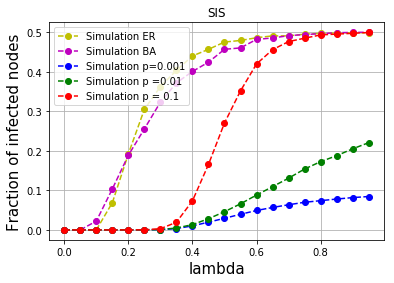

In [24]:
# plots

plt.figure()
plt.plot(lbda_er, rho_er, 'ro--', label='Simulation ER', color = 'y')
plt.plot(lbda_ba, rho_ba, 'ro--', label='Simulation BA', color = 'm')
plt.plot(lbda, rho, 'ro--', label='Simulation p=0.001', color = 'b')
plt.plot(lbda1, rho1, 'ro--', label='Simulation p =0.01', color = 'g')
plt.plot(lbda2, rho2, 'ro--', label= 'Simulation p = 0.1', color = 'r')

plt.xlabel("lambda", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)
#lambda_c = momment_of_degree_distribution(G,1)/momment_of_degree_distribution(G,2)
#plt.axvline(lambda_c, color = 'b', label='Theoretical lambda_c')
plt.title('SIS')
plt.legend()
plt.grid(True)
plt.show(True) 

### SIR

In [35]:
def SIR(G):
    # Epidemic parameters
    # Probabilidade de infeccao 
    beta = 0.3
    #Probabilidade de recuparacao
    mu = 1  

    def posicao(v, i):
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l
    # Numaro max de iteracoes
    Tmax = 20 
    av_rho = np.zeros(Tmax)
    for seed_node in G.nodes():
        vector_states = np.zeros(N) # vector that stores the states of the vertices
        vector_states[seed_node] = 1 # vector that stores the states
        ninfected = 1
        t = 0 # start in t= 0 
        infected = list() # Stores the number of infected nodes at each time step
        vt = list() #store the time step
        vrho = list()
        
        while ninfected > 0: # Simulate while we can find infected nodes
            infected = find(vector_states,1) # list of infected nodes
            for i in infected: # try to infect the neighbors
                neigs = G.neighbors(i)
                for j in neigs:
                    if np.random.rand() < beta:
                        # verifica se nao houve resuperacao
                        if(vector_states[j] != 2): 
                            vector_states[j] = 1
            # tenta recuperar nos infectados
            for k in infected: 
                if np.random.rand() < mu:
                    vector_states[k] = 2
            ninfected = len(find(vector_states,1))
            vrho.append(ninfected/N)
            t = t + 1
            vt.append(t)
        for x in arange(0, len(vrho)):
            av_rho[x] = av_rho[x] + vrho[x]

    av_rho = av_rho/len(G.nodes())
    vt = arange(0, Tmax)
    return vt, av_rho

In [39]:
# ER
N = 500
av_degree = 8
p = av_degree/(N-1)
m = int(av_degree/2)
G = nx.gnp_random_graph(N, p, seed=None, directed=False)
vt_er, av_rho_er  = SIR(G)

In [40]:
# Barabasi 
G = nx.barabasi_albert_graph(N, m)
vt_ba, av_rho_ba  = SIR(G)

In [43]:
# Small world 
k = int(av_degree/2)
G1 = nx.watts_strogatz_graph(N, k, 0.001, seed=None)
G2 = nx.watts_strogatz_graph(N, k, 0.01, seed=None)
G3 = nx.watts_strogatz_graph(N, k, 0.1, seed=None)
vt, av_rho  = SIR(G1)
vt1, av_rho1  = SIR(G2)
vt2, av_rho2  = SIR(G3)

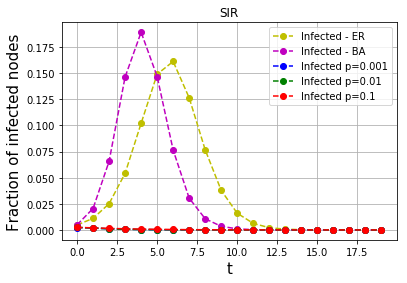

In [47]:
plt.figure()
plt.plot(vt_er, av_rho_er, 'ro--', label='Infected - ER', color = 'y')
plt.plot(vt_ba, av_rho_ba, 'ro--', label='Infected - BA', color = 'm')

plt.plot(vt, av_rho, 'ro--', label='Infected p=0.001', color = 'b')
plt.plot(vt1, av_rho1, 'ro--', label='Infected p=0.01', color = 'g')
plt.plot(vt2, av_rho2, 'ro--', label='Infected p=0.1', color = 'r')

plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of infected nodes", fontsize=15)
plt.legend()
plt.title('SIR')
plt.grid(True)
plt.show(True) 

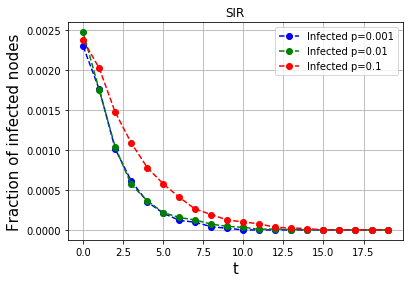

In [48]:
# plt.plot(vt, av_rho, 'ro--', label='Infected p=0.001', color = 'b')
# plt.plot(vt1, av_rho1, 'ro--', label='Infected p=0.01', color = 'g')
# plt.plot(vt2, av_rho2, 'ro--', label='Infected p=0.1', color = 'r')

# plt.xlabel("t", fontsize=15)
# plt.ylabel("Fraction of infected nodes", fontsize=15)
# plt.legend()
# plt.title('SIR')
# plt.grid(True)
# plt.show(True) 

## Exercicio 3 

Construct	the	plot	of	the	fraction	of	removed	nodes	(in	the	SIR	dynamics)	
versus	a	centrality	measure	(degree,	betweenness	centrality,	closeness	
centrality,	eigenvector	centrality,	accessibility,	k-core	and	
communicability	centrality).	Verify	which	of	these	measures	most	
influence	the	fraction	of	removed	nodes.

In [7]:
G1 = nx.read_edgelist("hamster.txt", nodetype=int, data=(('weight',float),))

In [12]:
G2 = nx.read_edgelist("C-elegans-protein-2007.txt")#, nodetype=int, data=(('weight',float),)

In [2]:
G = nx.read_edgelist("usairport.txt", nodetype = int, data = (('weight', float),))

A) Hamster 

In [3]:
#SIR considerando apenas o último valor da curva 'retirada' e o nó semente como parametro. 

# Random walk accessibility
def acc(G1):
    N = len(G1.nodes())
    vk = dict(G1.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G1)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0, N):
        for j in np.arange(i, N):
            if vk[i] != 0:
                P[i,j] = A[i,j]/vk[i]
            else:
                P[i,j] = 0
            P[j,i] = P[i,j]
    P2 = expm(P)/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*np.log(P2[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc
    return vacc

# Communicability centrality
def com(G1):
    N = len(G1.nodes())
    A = nx.adjacency_matrix(G1)
    C = expm(A)
    com = np.zeros(N)
    for i in range(N):
        com[i] = C[i,i]
    return com

#Função de achar posições de elementos num vetor
def posicao(v, i):
    l = []
    pos = 0
    for x in v:
        if(x == i):
            l.append(pos)
        pos = pos + 1
    return l

# Reactive process: SIR dynamics
def sir_process(G1, beta, mu, seed_node):
    N = len(G1)
    vector_states = np.zeros(N) # vector that stores the states of the vertices
    vector_states[seed_node] = 1 # vector that stores the states
    ninfected = 1
    t = 0 # start in t= 0 
    infected = list() # Stores the number of infected nodes at each time step
    vt = list() #store the time step
    vrho = list()
    vR = list()
    vS = list()
    # Reactive model
    while ninfected > 0: # Simulate while we can find infected nodes
        infected = posicao(vector_states,1) # list of infected nodes
        for i in infected: # try to infect the neighbors
            neigs = G1.neighbors(i)
            for j in neigs:
                if np.random.rand() < beta:
                    if(vector_states[j] != 2): # verify if the node is not recovered
                        vector_states[j] = 1
        for k in infected: # try to recover the infected nodes
            if np.random.rand() < mu:
                vector_states[k] = 2
        ninfected = len(posicao(vector_states,1))
        vrho.append(ninfected/N)
        vR.append(len(posicao(vector_states,2))/N)
        vS.append(len(posicao(vector_states,0))/N)
        t = t + 1
        vt.append(t)
    return vR[-1]

In [4]:
# degree centrality
deg_c =  list(dict(G1.degree()).values())
# betweness centrality
bet_c = list(dict(nx.betweenness_centrality(G1)).values()) 
 # closeness centrality
clo_c = list(dict(nx.closeness_centrality(G1)).values())
# eigenvector centrality
eig_c = list(dict(nx.eigenvector_centrality(G1, max_iter = 1000)).values()) 
# random walk acessibility
ace_c = acc(G1) 
# k-core
kco_c = list(dict(nx.core_number(G1)).values()) 
# comunicability centrality
com_c = com(G1) 

KeyboardInterrupt: 

In [ ]:
#Considera o ultimo valor de nos recuperados mudando a semente
for count, beta in enumerate(betas):
    print(beta, '\n')
    vR = []
    for node in G1.nodes():
        print(round(node/len(G1.nodes()), 3), end = '\r')
        aux = []
        for i in range(N):
            aux.append(sir_process(G1, beta, mu, node))
        vR.append(np.mean(aux))
    vR_beta.append(vR)
    print('\n')

In [ ]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5) 
plt.figure(figsize = (20,50))

plt.suptitle('Fracao de nos recuperados x degree centrality de US airport - SIR ', fontsize = 15, y = 0.9)

# Degree centrality
for count, i in enumerate(betas):
    # Pearson correlation
    cor = np.corrcoef(deg_c, vR_beta[count])[0,1]
    # Plot
    plt.subplot(7, 3, count+1)
    plt.title('($\\beta$={})'.format(i), fontsize = 15)
    plt.scatter(deg_c, vR_beta[count], label = 'corr={}'.format(round(cor,2)))
    plt.xlabel('Degree centrality', fontsize = 15)
    plt.ylabel('Fraction of recovered nodes', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid()
    plt.legend(fontsize = 15)

# Betweness centrality
for count, i in enumerate(betas):
    # Pearson correlation
    cor = np.corrcoef(bet_c, vR_beta[count])[0,1]
    # Plot
    plt.subplot(7, 3, count+1+3)
    plt.title('($\\beta$={})'.format(i), fontsize = 15)
    plt.scatter(bet_c, vR_beta[count], label = 'corr={}'.format(round(cor,2)))
    plt.xlabel('Betweness centrality', fontsize = 15)
    plt.ylabel('Fraction of recovered nodes', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid()
    plt.legend(fontsize = 15)

# Closeness centrality
for count, i in enumerate(betas):
    # Pearson correlation
    cor = np.corrcoef(clo_c, vR_beta[count])[0,1]
    # Plot
    plt.subplot(7, 3, count+1+3+3)
    plt.title('($\\beta$={})'.format(i), fontsize = 15)
    plt.scatter(clo_c, vR_beta[count], label = 'corr={}'.format(round(cor,2)))
    plt.xlabel('Closeness centrality', fontsize = 15)
    plt.ylabel('Fraction of recovered nodes', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid()
    plt.legend(fontsize = 15)
    
# Eigenvector centrality
for count, i in enumerate(betas):
    # Pearson correlation
    cor = np.corrcoef(eig_c, vR_beta[count])[0,1]
    # Plot
    plt.subplot(7, 3, count+1+3+3+3)
    plt.title('($\\beta$={})'.format(i), fontsize = 15)
    plt.scatter(eig_c, vR_beta[count], label = 'corr={}'.format(round(cor,2)))
    plt.xlabel('Eigenvector centrality', fontsize = 15)
    plt.ylabel('Fraction of recovered nodes', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid()
    plt.legend(fontsize = 15)
    
# Random walk acessibility
for count, i in enumerate(betas):
    # Pearson correlation
    cor = np.corrcoef(ace_c, vR_beta[count])[0,1]
    # Plot
    plt.subplot(7, 3, count+1+3+3+3+3)
    plt.title('($\\beta$={})'.format(i), fontsize = 15)
    plt.scatter(ace_c, vR_beta[count], label = 'corr={}'.format(round(cor,2)))
    plt.xlabel('Random walk acessibility', fontsize = 15)
    plt.ylabel('Fraction of recovered nodes', fontsize = 15)
    plt.xticks(fontsize = 15, rotation = -45)
    plt.yticks(fontsize = 15)
    plt.grid()
    plt.legend(fontsize = 15)
    
# k-core
for count, i in enumerate(betas):
    # Pearson correlation
    cor = np.corrcoef(kco_c, vR_beta[count])[0,1]
    # Plot
    plt.subplot(7, 3, count+1+3+3+3+3+3)
    plt.title('($\\beta$={})'.format(i), fontsize = 15)
    plt.scatter(kco_c, vR_beta[count], label = 'corr={}'.format(round(cor,2)))
    plt.xlabel('K-core', fontsize = 15)
    plt.ylabel('Fraction of recovered nodes', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid()
    plt.legend(fontsize = 15)

# Comunicability centrality
for count, i in enumerate(betas):
    # Pearson correlation
    cor = np.corrcoef(com_c, vR_beta[count])[0,1]
    # Plot
    plt.subplot(7, 3, count+1+3+3+3+3+3+3)
    plt.title('($\\beta$={})'.format(i), fontsize = 15)
    plt.scatter(com_c, vR_beta[count], label = 'corr={}'.format(round(cor,2)))
    plt.xlabel('Comunicability centrality', fontsize = 15)
    plt.ylabel('Fraction of recovered nodes', fontsize = 15)
    plt.xticks(fontsize = 15, rotation = -45)
    plt.yticks(fontsize = 15)
    plt.grid()
    plt.legend(fontsize = 15)
    
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [ ]:
###  Para a c.elegans 
# Remove self loop edges (this network has)
def remove_self_loop(G):
    G_aux = G.copy()
    for i in G.edges():
        if i[0] == i[1]:
            G_aux.remove_edge(i[0], i[1])
    return G_aux

# reading the network
G = nx.read_edgelist("data/C-elegans-protein-2007.txt", nodetype=str, data=(('weight',float),)).to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0)
G = remove_self_loop(G)



In general, for all of the tested networks, k-core and closeness centrality were the measures that showed highest correlation with the fraction of recovered nodes. It's important to highlight that all centrality measures showed positive correlations with the fraction of recovered nodes, remembering that the approach was, each step, use a different network node as seed to the SIR process and the last value (stationary curve region) of the fraction of recovered nodes curve was picked.